In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [95]:
df = pd.read_csv('total_data_set.csv', thousands=',')
df

,날짜,종가,오픈,거래량,변동 %,실업자,실업률(%),청년실업자,청년실업률(%),빈도(부정),빈도(긍정),코스피지수변화,순매수비율
0,2017-05-23,3206000,3104000,21.58K,3.29%,99.50000,3.60000,40.80000,9.20000,16.90149,14.58574,0.00330,0.00820
1,2017-05-24,4175000,3206000,34.68K,30.22%,99.50000,3.60000,40.80000,9.20000,16.92568,15.11493,0.00240,0.00820
2,2017-05-25,4199000,4175000,35.91K,0.57%,99.50000,3.60000,40.80000,9.20000,16.57495,16.02447,0.01100,0.00820
3,2017-05-26,3227000,4199000,36.65K,-23.15%,99.50000,3.60000,40.80000,9.20000,14.21660,12.58475,0.00530,0.00820
4,2017-05-27,3152000,3227000,33.75K,-2.32%,99.50000,3.60000,40.80000,9.20000,10.08647,8.97965,0.00000,0.00820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,2021-07-02,39417000,39335000,0.52K,0.21%,92.00000,3.20000,30.80000,7.20000,16.68379,15.77641,-0.00010,0.00299
1502,2021-07-03,40335000,39413000,0.19K,2.33%,92.00000,3.20000,30.80000,7.20000,13.23093,10.73259,0.00000,0.00299
1503,2021-07-04,40914000,41183000,0.55K,1.44%,92.00000,3.20000,30.80000,7.20000,11.24750,10.78220,0.00000,0.00299
1504,2021-07-05,39484000,40914000,0.70K,-3.50%,92.00000,3.20000,30.80000,7.20000,15.66184,17.03323,0.00350,0.00299


In [96]:
df['거래량'] = df.거래량.str.replace('K', '').astype('float32')


In [97]:
df['변동 %']=df.거래량.replace('%', '').astype('float32')

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df=df.drop('날짜', axis=1)
df_scaled = scaler.fit_transform(df)

df= pd.DataFrame(df_scaled)




In [99]:
df.columns = ['종가', '오픈', '거래량','변동 %', '실업자','실업률(%)' ,'청년실업자', '청년실업률(%)', '빈도(부정)','빈도(긍정)', '코스피지수변화', '순매수비율']

In [100]:
prediction_days = 121
df_train= df[:1506-prediction_days]
df_test= df[1506-prediction_days:]


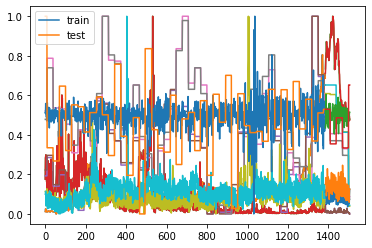

In [101]:
ax = df_train.plot()
df_test.plot(ax=ax)
plt.legend(['train', 'test'])

In [102]:
df

,종가,오픈,거래량,변동 %,실업자,실업률(%),청년실업자,청년실업률(%),빈도(부정),빈도(긍정),코스피지수변화,순매수비율
0,0.01266,0.01136,0.17584,0.17584,0.19242,0.22222,0.52174,0.47826,0.11399,0.09970,0.51324,1.00000
1,0.02501,0.01266,0.28278,0.28278,0.19242,0.22222,0.52174,0.47826,0.11425,0.10528,0.50795,1.00000
2,0.02532,0.02501,0.29282,0.29282,0.19242,0.22222,0.52174,0.47826,0.11051,0.11487,0.55856,1.00000
3,0.01293,0.02532,0.29886,0.29886,0.19242,0.22222,0.52174,0.47826,0.08536,0.07861,0.52501,1.00000
4,0.01197,0.01293,0.27518,0.27518,0.19242,0.22222,0.52174,0.47826,0.04133,0.04061,0.49382,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.47425,0.47319,0.00392,0.00392,0.08708,0.07407,0.03865,0.04348,0.11167,0.11225,0.49323,0.65224
1502,0.48595,0.47419,0.00122,0.00122,0.08708,0.07407,0.03865,0.04348,0.07485,0.05909,0.49382,0.65224
1503,0.49333,0.49675,0.00416,0.00416,0.08708,0.07407,0.03865,0.04348,0.05371,0.05961,0.49382,0.65224
1504,0.47510,0.49332,0.00539,0.00539,0.08708,0.07407,0.03865,0.04348,0.10077,0.12550,0.51442,0.65224


In [103]:
df_train

,종가,오픈,거래량,변동 %,실업자,실업률(%),청년실업자,청년실업률(%),빈도(부정),빈도(긍정),코스피지수변화,순매수비율
0,0.01266,0.01136,0.17584,0.17584,0.19242,0.22222,0.52174,0.47826,0.11399,0.09970,0.51324,1.00000
1,0.02501,0.01266,0.28278,0.28278,0.19242,0.22222,0.52174,0.47826,0.11425,0.10528,0.50795,1.00000
2,0.02532,0.02501,0.29282,0.29282,0.19242,0.22222,0.52174,0.47826,0.11051,0.11487,0.55856,1.00000
3,0.01293,0.02532,0.29886,0.29886,0.19242,0.22222,0.52174,0.47826,0.08536,0.07861,0.52501,1.00000
4,0.01197,0.01293,0.27518,0.27518,0.19242,0.22222,0.52174,0.47826,0.04133,0.04061,0.49382,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
1380,0.70911,0.68469,0.01224,0.01224,0.50140,0.48148,0.60870,0.65217,0.09026,0.14014,0.56975,0.52942
1381,0.69011,0.70834,0.01535,0.01535,0.50140,0.48148,0.60870,0.65217,0.10226,0.14764,0.41848,0.52942
1382,0.69209,0.68976,0.04939,0.04939,0.50140,0.48148,0.60870,0.65217,0.09639,0.13300,0.46027,0.52942
1383,0.68674,0.69242,0.03363,0.03363,0.50140,0.48148,0.60870,0.65217,0.06196,0.07914,0.49382,0.52942


In [104]:
df_test

,종가,오픈,거래량,변동 %,실업자,실업률(%),청년실업자,청년실업률(%),빈도(부정),빈도(긍정),코스피지수변화,순매수비율
1385,0.73379,0.71132,0.03682,0.03682,0.50140,0.48148,0.60870,0.65217,0.10903,0.15043,0.43496,0.52942
1386,0.77380,0.73401,0.01045,0.01045,0.50140,0.48148,0.60870,0.65217,0.12044,0.15200,0.45438,0.52942
1387,0.78954,0.77421,0.01682,0.01682,0.50140,0.48148,0.60870,0.65217,0.12160,0.16245,0.45851,0.52942
1388,0.81442,0.79022,0.01388,0.01388,0.50140,0.48148,0.60870,0.65217,0.11696,0.18372,0.60447,0.52942
1389,0.81904,0.81440,0.00980,0.00980,0.50140,0.48148,0.60870,0.65217,0.11057,0.16733,0.57328,0.52942
...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.47425,0.47319,0.00392,0.00392,0.08708,0.07407,0.03865,0.04348,0.11167,0.11225,0.49323,0.65224
1502,0.48595,0.47419,0.00122,0.00122,0.08708,0.07407,0.03865,0.04348,0.07485,0.05909,0.49382,0.65224
1503,0.49333,0.49675,0.00416,0.00416,0.08708,0.07407,0.03865,0.04348,0.05371,0.05961,0.49382,0.65224
1504,0.47510,0.49332,0.00539,0.00539,0.08708,0.07407,0.03865,0.04348,0.10077,0.12550,0.51442,0.65224


In [105]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)


In [106]:
print(type(df_train))
X_train=df_train.drop('종가', axis=1)
print(X_train.shape)




<class 'pandas.core.frame.DataFrame'>
(1385, 11)


In [107]:
y_train = df_train[['종가']]


In [108]:
y_train

,종가
0,0.01266
1,0.02501
2,0.02532
3,0.01293
4,0.01197
...,...
1380,0.70911
1381,0.69011
1382,0.69209
1383,0.68674


In [109]:
print(type(X_train))
print(X_train.shape)
print(y_train.shape)
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
(1385, 11)
(1385, 1)
<class 'pandas.core.frame.DataFrame'>


In [110]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)


In [111]:
train_feature, train_label = make_dataset(X_train, y_train, 5)

# train, validation set 생성
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)



In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Initialising the LSTM
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# Compiling the LSTM
model.compile(loss = 'mean_squared_error',optimizer = 'adam',)
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)


# Fitting the LSTM to the Training set
model.fit(X_train, y_train, batch_size = 16, epochs = 200)


Epoch 1/200
69/69 [==============================] - 1s 3ms/step - loss: 0.0125
Epoch 2/200
69/69 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 3/200
69/69 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 4/200
69/69 [==============================] - 0s 2ms/step - loss: 6.6859e-04

In [113]:
X_test=df_test.drop('종가', axis=1)

y_test = df_test[['종가']]


print(X_test.shape)
print(y_test.shape)

print(type(y_test))


(121, 11)
(121, 1)
<class 'pandas.core.frame.DataFrame'>


In [114]:
test_feature, test_label = make_dataset(X_test, y_test,5)
test_feature.shape, test_label.shape

((116, 5, 11), (116, 1))

In [129]:
pred_lstm = model.predict(test_feature)

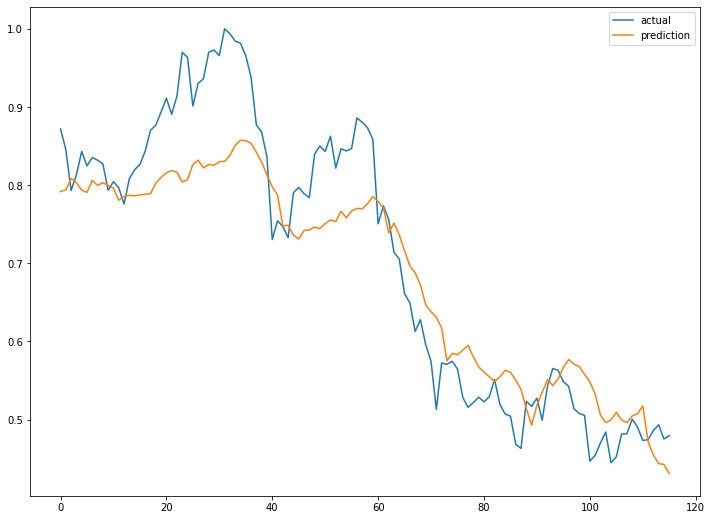

In [130]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred_lstm, label='prediction')
plt.legend()
plt.show()


In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)

    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE, RMSE, RMSLE, R2],
                          index=['MAE', 'RMSE', 'RMSLE', 'R2'],
                          columns=['Results'])
    return Result

In [132]:
y_pred_lstm = pd.DataFrame(pred_lstm[:,0])
y_test_lstm = y_test[0:len(pred_lstm)]

confirm_result(y_test_lstm, y_pred_lstm)

,Results
MAE,0.05657
RMSE,0.06952
RMSLE,0.03916
R2,0.84477


In [119]:
# Initialising the GRU
model_gru = Sequential()
model_gru.add(LSTM(16,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model_gru.add(Dense(1))

# Compiling the GRU
model_gru.compile(loss = 'mean_squared_error',optimizer = 'adam',)
early_stop_gru = EarlyStopping(monitor='loss', patience=1, verbose=1)


# Fitting the GRU to the Training set
model_gru.fit(X_train, y_train, batch_size = 16, epochs = 200)


Epoch 1/200
69/69 [==============================] - 1s 2ms/step - loss: 0.0130
Epoch 2/200
69/69 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 3/200
69/69 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 4/200


In [120]:
pred_gru = model_gru.predict(test_feature)

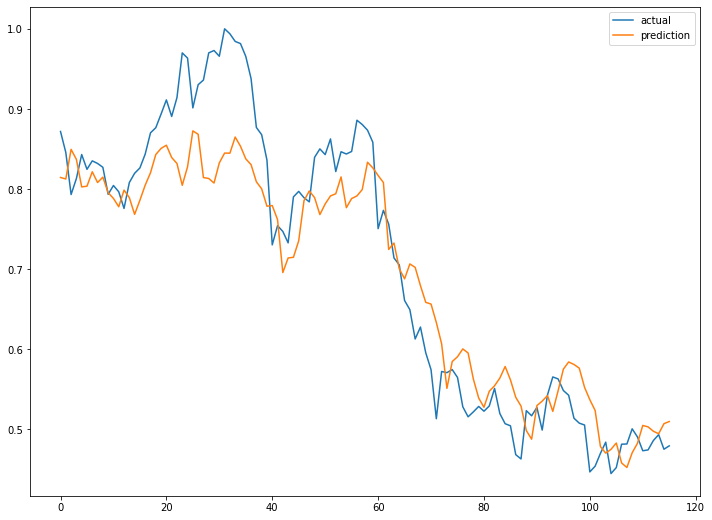

In [121]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred_gru, label='prediction')
plt.legend()
plt.show()


In [127]:
y_pred_gru = pd.DataFrame(pred_gru[:,0])
y_test_gru = y_test[0:len(pred_gru)]

confirm_result(y_test_gru, y_pred_gru)

,Results
MAE,0.05072
RMSE,0.06383
RMSLE,0.03594
R2,0.86917
